# Machine Learning - Assignment 3

Arne Huckemann (ahuckema), Elise Wolf (eliwolf)

In [49]:
import numpy as np
from numpy.linalg import svd, matrix_rank
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from util import (
    svdcomp,
    nextplot,
    plot_matrix,
    plot_xy,
    plot_cov,
    match_categories,
)  # see util.py
from sklearn.cluster import KMeans

# setup plotting
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
inJupyterLab = any(filter(lambda x: x.endswith("jupyter-lab"), psutil.Process().parent().cmdline()))
if not inJupyterLab:
    from IPython import get_ipython
    get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")

# 1 Intuition on SVD

In [50]:
M1 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
    ]
)

M2 = np.array(
    [
        [0, 0, 0, 0, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 2, 1, 2, 0],
        [0, 0, 0, 0, 0],
    ]
)

M3 = np.array([[0, 0, 0, 0], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1], [0, 1, 1, 1]])

M4 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 0, 1, 1],
    ]
)

M5 = np.array(
    [
        [1, 1, 1, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 1, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1],
    ]
)

M6 = np.array(
    [
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 0, 1, 1],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1],
    ]
)

## 1b

In [59]:
U1, s1, Vt1 = svd(M1)
U2, s2, Vt2 = svd(M2)
U3, s3, Vt3 = svd(M3)
U4, s4, Vt4 = svd(M4)
U5, s5, Vt5 = svd(M5)
U6, s6, Vt6 = svd(M6)

# Print the results
print("SVD of M1:")
print("U1:", U1)
print("s1:", s1)
print("Vt1:", Vt1)

print("\nSVD of M2:")
print("U2:", U2)
print("s2:", s2)
print("Vt2:", Vt2)

print("\nSVD of M3:")
print("U3:", U3)
print("s3:", s3)
print("Vt3:", Vt3)

print("\nSVD of M4:")
print("U4:", U4)
print("s4:", s4)
print("Vt4:", Vt4)

print("\nSVD of M5:")
print("U5:", U5)
print("s5:", s5)
print("Vt5:", Vt5)

print("\nSVD of M6:")
print("U6:", U6)
print("s6:", s6)
print("Vt6:", Vt6)

SVD of M1:
U1: [[-5.77350269e-01  8.16496581e-01 -8.75605293e-17  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01 -7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [-5.77350269e-01 -4.08248290e-01  7.07106781e-01  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]]
s1: [3.00000000e+00 1.33801123e-16 1.31940794e-49 0.00000000e+00
 0.00000000e+00]
Vt1: [[-0.57735027 -0.57735027 -0.57735027 -0.         -0.        ]
 [ 0.81649658 -0.40824829 -0.40824829  0.          0.        ]
 [-0.          0.70710678 -0.70710678 -0.         -0.        ]
 [ 0.          0.          0.          0.          1.        ]
 [ 0.          0.          0.          1.          0.        ]]

SVD of M2:
U2: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00]
 [-5.77350269e-01  8.16496581e-01  8.75605293e-17  0.00

## 1c

In [60]:
# You can use the functions svdcomp and plot_matrix from util.py
# YOUR PART

# Count the number of non-zero singular values
non_zero_singular_values_M6 = np.sum(s6 > 1e-10)
print(f"Number of non-zero singular values for M6: {non_zero_singular_values_M6}")

Number of non-zero singular values for M6: 2


## 1d

In [53]:
# Another method to compute the rank is matrix_rank.
# YOUR PART

# 2 The SVD on Weather Data

In [54]:
# Load the data
climate = pd.read_csv("data/worldclim.csv")
coord = pd.read_csv("data/worldclim_coordinates.csv")
lon = coord["lon"]
lat = coord["lat"]

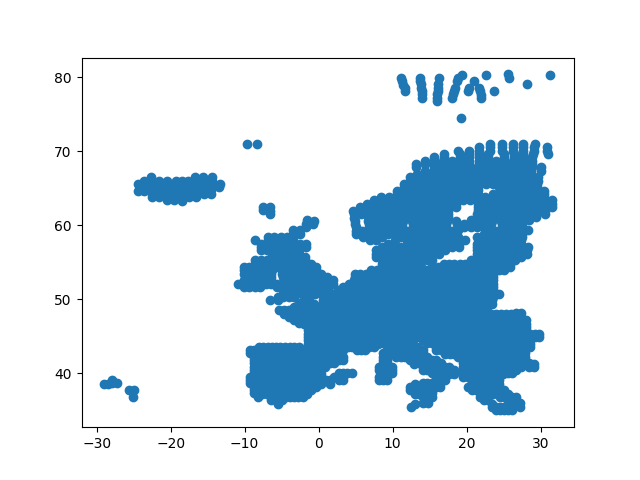

In [55]:
# Plot the coordinates
plot_xy(lon, lat)

## 2a

In [56]:
# YOUR PART
# Normalize the data to z-scores. Store the result in X.

NameError: name 'X' is not defined

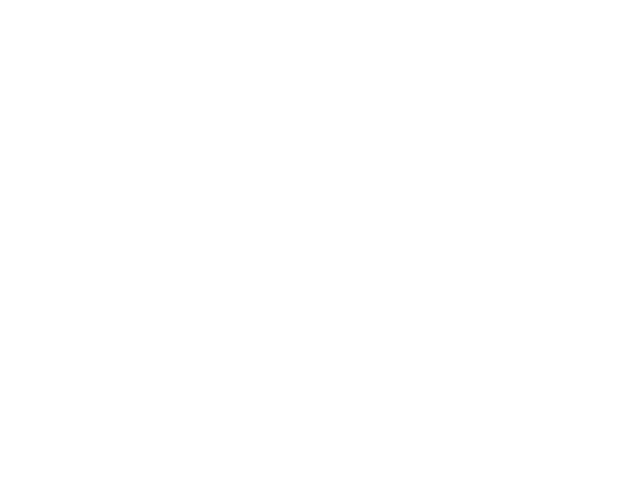

In [57]:
# Plot histograms of attributes
nextplot()
X.hist(ax=plt.gca())

## 2b

In [ ]:
# Compute the SVD of the normalized climate data and store it in variables U,s,Vt. What
# is the rank of the data?
# YOUR PART

## 2c

In [ ]:
# Here is an example plot.
plot_xy(lon, lat, U[:, 0])

In [ ]:
# For interpretation, it may also help to look at the other component matrices and
# perhaps use other plot functions (e.g., plot_matrix).
# YOUR PART

## 2d

In [ ]:
# Here is an example.
plot_xy(U[:, 0], U[:, 1], lat - np.mean(lat))

## 2e

In [ ]:
# 2e(i) Guttman-Kaiser
# YOUR PART

In [ ]:
# 2e(ii) 90% squared Frobenius norm
# YOUR PART

In [ ]:
# 2e(iv) entropy
# YOUR PART

In [ ]:
# 2e(v) random flips
# Random sign matrix: np.random.choice([-1,1], X.shape)
# YOUR PART

## 2f

In [ ]:
# Here is the empty plot that you need to fill (one line per choice of k: RSME between
# original X and the reconstruction from size-k SVD of noisy versions)
# YOUR PART
nextplot()
plt.plot()
plt.xlabel(r"Noise level ($\epsilon$)")
plt.ylabel("Reconstruction RMSE vs. original data")

# 3 SVD and k-means

In [ ]:
# Cluster the normalized climate data into 5 clusters using k-means and store
# the vector giving the cluster labels for each location.
X_clusters = KMeans(5).fit(X).labels_

## 3a

In [ ]:
# Plot the results to the map: use the cluster labels to give the color to each
# point.
plot_xy(lon, lat, X_clusters)

## 3b

In [ ]:
# YOUR PART HERE

## 3c

In [ ]:
# Compute the PCA scores, store in Z (of shape N x k)
k = 2
# YOUR PART HERE

In [ ]:
# cluster and visualize
Z_clusters = KMeans(5).fit(Z).labels_
# match clusters as well as possible (try without)
Z_clusters = match_categories(X_clusters, Z_clusters)
nextplot()
axs = plt.gcf().subplots(1, 2)
plot_xy(lon, lat, X_clusters, axis=axs[0])
axs[0].set_title("Original data")
plot_xy(lon, lat, Z_clusters, axis=axs[1])
axs[1].set_title(f"PCA $(k={k}$)")